# 学生数据分析

## 数据导入并展示

In [1]:
%config ZMQInteractiveShell.ast_node_interactivity='all'
import pandas as pd
import numpy as np

In [2]:
df_info=pd.read_csv('./data/student-info.csv',delimiter=';')
df_score=pd.read_csv('./data/student-score.csv',delimiter=';')

df_info.shape
df_score.shape
df_info.head()
df_score.head()

(395, 31)

(395, 4)

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,yes,no,no,4,3,4,1,1,3,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,yes,yes,no,5,3,3,1,1,3,4
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,yes,yes,no,4,3,2,2,3,3,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,yes,yes,yes,3,2,2,1,1,5,2
4,4,GP,F,16,U,GT3,T,3,3,other,...,yes,no,no,4,3,2,1,2,5,4


,ID,G1,G2,G3
0,0,5,6,6
1,1,5,5,6
2,2,7,8,10
3,3,15,14,15
4,4,6,10,10


In [3]:
df_info.columns

Index(['ID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

##  "df_info" 和 "df_score" 按照学生ID对齐拼接起来

In [4]:
df = pd.merge(df_info, df_score, on="ID", how="inner")
df.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


### 把"df"所有的列展示出来

In [5]:
df.columns

Index(['ID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### 统计男生的平均分和女生的平均分(G1, G2, G3)，使用groupby和aggregate来操作

In [6]:
result=df.groupby('sex').agg({'G1':np.mean,'G2':np.mean,'G3':np.mean})
result

,G1,G2,G3
sex,,,
F,10.620192,10.389423,9.966346
M,11.229947,11.074866,10.914439


### 统计不同年龄的学生(G1, G2, G3)的平均分，并作出柱状图展示

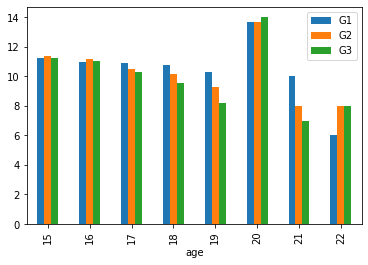

In [7]:
%matplotlib inline
result2=df.groupby('age')['G1','G2','G3'].agg(np.mean)
result2.plot(kind='bar')

In [8]:
result2

,G1,G2,G3
age,,,
15,11.231707,11.365854,11.256098
16,10.942308,11.182692,11.028846
17,10.897959,10.479592,10.275510
18,10.719512,10.134146,9.548780
19,10.250000,9.250000,8.208333
20,13.666667,13.666667,14.000000
21,10.000000,8.000000,7.000000
22,6.000000,8.000000,8.000000


### 统计不同学校(school一列)的学生的平均分，并作柱状图展示，要求同一科目的两个学校成绩贴在一起展示

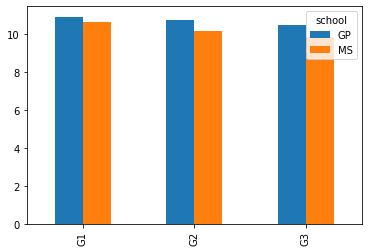

In [9]:
result2=df.groupby('school')['G1','G2','G3'].agg(np.mean)

result2.T.plot(kind='bar')

### 统计一下每个学校三个科目总分的前十名，然后把前十名的同学所有信息输出

In [10]:
df['total_score'] = df['G1'] + df['G2'] + df['G3']    # 对total_score列操作
df.head()

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total_score
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,3,4,1,1,3,6,5,6,6,17
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,3,3,1,1,3,4,5,5,6,16
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,3,2,2,3,3,10,7,8,10,25
3,3,GP,F,15,U,GT3,T,4,2,health,...,2,2,1,1,5,2,15,14,15,44
4,4,GP,F,16,U,GT3,T,3,3,other,...,3,2,1,2,5,4,6,10,10,26


> groupby得到分组对象，分组对象是一个可迭代的对象iterable，如下面的，group是df，school是依据分类的unique。
> 利用rank函数，可以得到选出前几名

In [11]:
# 需要考虑得分相同时对名次占用的情况
for school, group in df.groupby('school', sort = False):
    groupby_school = group.sort_values(by = 'total_score', ascending = False)
    groupby_school = groupby_school[groupby_school.total_score.rank(ascending = False, method = 'min') < 11]   # 得分相同算同一名次
    groupby_school

,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total_score
47,47,GP,M,16,U,GT3,T,4,3,health,...,2,2,1,1,2,4,19,19,20,58
113,113,GP,M,15,U,LE3,T,4,2,teacher,...,5,2,1,1,3,10,18,19,19,56
110,110,GP,M,15,U,LE3,A,4,4,teacher,...,5,3,1,1,4,6,18,19,19,56
42,42,GP,M,15,U,GT3,T,4,4,services,...,3,3,1,1,5,2,19,18,18,55
286,286,GP,F,18,U,GT3,T,2,2,at_home,...,3,3,1,2,2,5,18,18,19,55
129,129,GP,M,16,R,GT3,T,4,4,teacher,...,5,5,2,5,4,8,18,18,18,54
245,245,GP,M,16,U,GT3,T,2,1,other,...,3,3,1,1,4,6,18,18,18,54
293,293,GP,F,17,R,LE3,T,3,1,services,...,1,2,1,1,3,6,18,18,18,54
198,198,GP,F,17,U,GT3,T,4,4,services,...,2,4,2,3,2,24,18,18,18,54
306,306,GP,M,20,U,GT3,A,3,2,services,...,5,3,1,1,5,0,17,18,18,53


,ID,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total_score
374,374,MS,F,18,R,LE3,T,4,4,other,...,4,4,1,1,1,0,19,18,19,56
359,359,MS,F,18,U,LE3,T,1,1,at_home,...,3,2,1,1,4,0,18,16,16,50
391,391,MS,M,17,U,LE3,T,3,1,services,...,4,5,3,4,2,3,14,16,16,46
363,363,MS,F,17,U,LE3,T,4,4,at_home,...,3,4,1,1,1,0,16,15,15,46
378,378,MS,F,18,U,GT3,T,3,3,other,...,1,3,1,2,1,0,15,15,15,45
376,376,MS,F,20,U,GT3,T,4,2,health,...,4,3,1,1,3,4,15,14,15,44
380,380,MS,M,18,U,GT3,T,4,4,teacher,...,2,4,1,4,2,4,15,14,14,43
366,366,MS,M,18,U,LE3,T,4,4,teacher,...,2,2,2,2,5,0,13,13,13,39
351,351,MS,M,17,U,GT3,T,3,3,health,...,5,4,2,3,3,2,13,13,13,39
360,360,MS,F,18,R,LE3,A,1,4,at_home,...,3,4,1,4,5,0,13,13,13,39


# 沃尔玛销售数据整理

## 数据导入并展示

In [12]:
df_stores = pd.read_csv("./data/walmart/stores.csv")
print(df_stores.head())
print(df_stores.shape)

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875
(45, 3)


In [13]:
df_feats = pd.read_csv("./data/walmart/features.csv", parse_dates=["Date"])
df_feats = df_feats[["Store", "Date", "Temperature", "Fuel_Price", "CPI", "Unemployment"]]
df_feats.head()
df_feats.shape

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,42.31,2.572,211.096358,8.106
1,1,2010-02-12,38.51,2.548,211.242170,8.106
2,1,2010-02-19,39.93,2.514,211.289143,8.106
3,1,2010-02-26,46.63,2.561,211.319643,8.106
4,1,2010-03-05,46.50,2.625,211.350143,8.106


(8190, 6)

In [14]:
df_sales = pd.read_csv("./data/walmart/sales.csv", parse_dates=["Date"])
df_sales.head()
df_sales.shape

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


(421570, 5)

## 店铺的销售总额

**df_sales 中每个Store有很多个Dept(department)， 只关心整家店的销售情况，所以把这张表格按照Store和Date来计算整店销售总额，IsHoliday这一列不必保留。结果保存在df_sales_by_store中。**

In [15]:
df_sales_by_store = df_sales[["Store", "Date", "Weekly_Sales", "IsHoliday"]].groupby(["Store", "Date"], as_index=False).agg({"Weekly_Sales": sum})
df_sales_by_store.head()

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17
3,1,2010-02-26,1409727.59
4,1,2010-03-05,1554806.68


**使用 Store 和 Date 这两列合并 df_sales_by_store 和 df_feats 两张表格，结果保存在 df_sale_feats**

In [16]:
df_sale_feats = pd.merge(df_sales_by_store, df_feats, left_on=["Store", "Date"], right_on=["Store", "Date"])
df_sale_feats.head()
df_sale_feats.shape

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106


(6435, 7)

**使用 Store 这一列合并 df_sale_feats 和 df_stores 两张表格，结果仍然保留在df_sale_feats 中**

In [17]:
df_sale_feats = pd.merge(df_sale_feats, df_stores, left_on=["Store"], right_on=["Store"])
df_sale_feats.head()
df_sale_feats.shape

,Store,Date,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,2010-02-05,1643690.90,42.31,2.572,211.096358,8.106,A,151315
1,1,2010-02-12,1641957.44,38.51,2.548,211.242170,8.106,A,151315
2,1,2010-02-19,1611968.17,39.93,2.514,211.289143,8.106,A,151315
3,1,2010-02-26,1409727.59,46.63,2.561,211.319643,8.106,A,151315
4,1,2010-03-05,1554806.68,46.50,2.625,211.350143,8.106,A,151315


(6435, 9)